In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ssa_functions import create_matrix
from ssa_functions import reconstruct_series
import sys
sys.path.append(sys.path[0][:-9] + "/common/")
import functions
import statsmodels.api as sm

data = pd.read_csv("data.csv", decimal = ',', sep = ';')
print("data shape" + str(data.shape))
X = create_matrix(data.to_numpy(), 14)
pd.DataFrame(X).to_excel("matrixes/X.xlsx")

data shape(48, 1)


In [3]:
# getting correlation matrix for X matrix
corr_x_matrix = np.corrcoef(np.transpose(X))
pd.DataFrame(corr_x_matrix).to_excel("matrixes/X_correlations.xlsx")

#getting own meanings
c_L = functions.eig_matlab(corr_x_matrix)[0]
pd.DataFrame(c_L).to_excel("matrixes/corr_lambdas.xlsx")

# gerring number of values > 1
for i in range(c_L.shape[1]):
    if c_L[i,i] < 1:
        break

/home/kfa/KFA/Programming/multivariate_statistical_analysis//common/functions.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[i] = l


In [4]:
A = np.dot(X,np.transpose(X))
[L, V] = functions.eig_matlab(A)

V= V[:,0:i]

pd.DataFrame(V).to_excel("matrixes/vectors.xlsx")

X_n = np.dot(np.dot(V,np.transpose(V)), X)
pd.DataFrame(X_n).to_excel("matrixes/new_X_matrix.xlsx")

In [5]:
new_data = reconstruct_series(X_n)
print(new_data)


[304.97362330345914, 310.93433988044484, 319.67337983805584, 325.7349740350268, 328.54127504218525, 326.50173429116285, 317.5756419365577, 305.04152345921466, 292.6034880577159, 283.51549380229727, 280.4437461624019, 283.92390572549306, 291.89400438466095, 325.38072519231025, 337.38605366620453, 352.1727579261708, 365.6933152699829, 376.41289463459555, 380.56121275168783, 375.6799946525677, 366.83388646159204, 361.3855571528289, 363.3887318806518, 371.1943253336086, 374.5990766642813, 367.0594983713478, 350.8727149834834, 339.38107710435764, 342.7521382259475, 360.765828655149, 387.9684608085782, 420.54108904129964, 456.94292767734873, 495.46508552115307, 523.8542007123544, 493.59413645484443, 475.2305065915009, 437.31513640195476, 400.111097882468, 380.5370736617125, 374.78200389214777, 366.6270715927504, 352.6685475755582, 338.8767079843168, 337.5116905409759, 362.38181682499663, 404.75600600761544, 443.52706744625453]


In [7]:
# building arima model using input data
# stationarity test
print("ADF test: p=%f" % sm.tsa.stattools.adfuller(data['y'])[1])
data['diff1'] = data['y'] - data['y'].shift(1)
print("ADF test: p=%f" % sm.tsa.stattools.adfuller(data['diff1'][1:])[1])

ADF test: p=0.357234
ADF test: p=0.000006


<ipython-input-8-767e9bc12381>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot('211')
<ipython-input-8-767e9bc12381>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot('212')


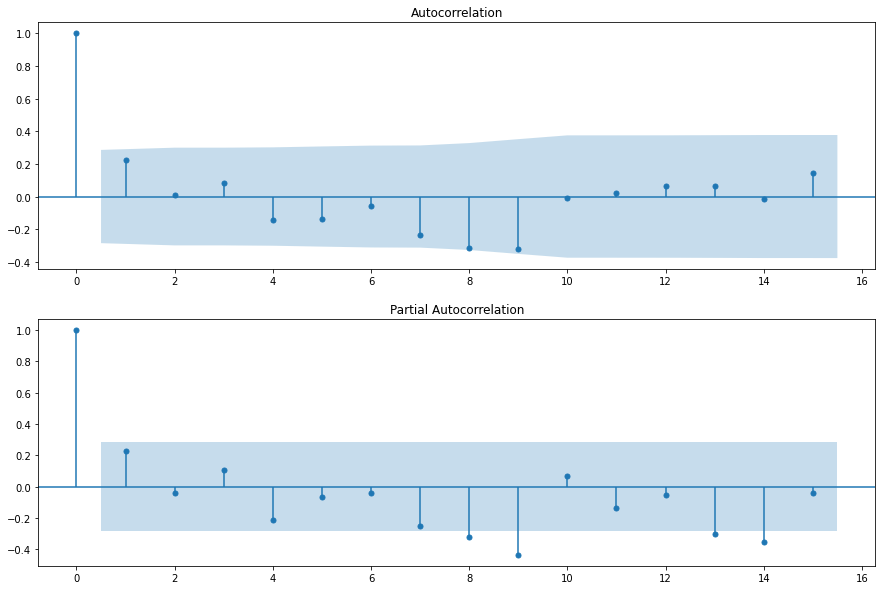

In [8]:
fig = plt.figure(figsize = [15, 10])
ax = plt.subplot('211')
a = sm.graphics.tsa.plot_acf(data['diff1'][1:], lags=15, ax = ax)

ax = plt.subplot('212')
a = sm.graphics.tsa.plot_pacf(data['diff1'][1:], lags=15, ax = ax)
plt.savefig("pictures/correlogramm_diff1.png")


In [15]:
# find order with best AIC
test = sm.tsa.arma_order_select_ic(data['diff1'][1:],max_ar=5, max_ma=5, ic='aic')

ramework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/kfa/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnin

In [14]:
test['aic'].to_excel("matrixes/best_aic_selection.xlsx")
print(test)

NameError: name 'test' is not defined

                                  SARIMAX Results                                  
Dep. Variable:                           y   No. Observations:                   48
Model:             SARIMAX([4, 9], 1, [7])   Log Likelihood                -213.064
Date:                     Sun, 30 May 2021   AIC                            434.127
Time:                             20:01:57   BIC                            441.528
Sample:                                  0   HQIC                           436.912
                                      - 48                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L4         -0.1566      0.126     -1.242      0.214      -0.404       0.091
ar.L9         -0.3586      0.164     -2.180      0.029      -0.681      -0.036
ma.L7       

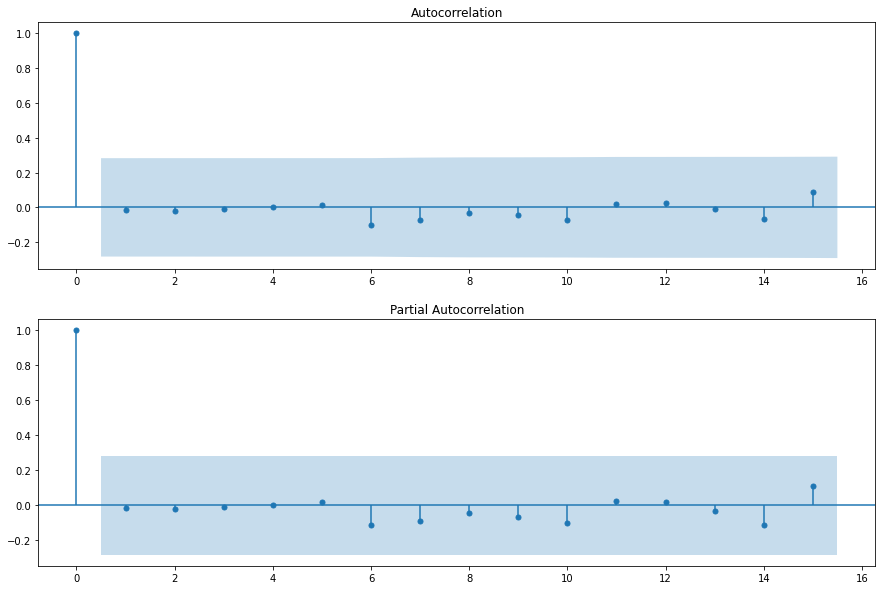

In [11]:
#model=sm.tsa.statespace.SARIMAX(data['y'], order=([1,2,5,6,7,8,9,10], 1, [1,2,4,5,6,7,8,9,10])).fit(disp=-1)
model=sm.tsa.statespace.SARIMAX(data['y'], order=([9,4], 1, [7])).fit(disp=-1)
print(model.summary())

data['pred'] = model.predict(start=0, end=48)

fig = plt.figure(figsize = [15, 10])
ax = plt.subplot('211')
a = sm.graphics.tsa.plot_acf(model.resid, lags=15, ax = ax)

ax = plt.subplot('212')
a = sm.graphics.tsa.plot_pacf(model.resid, lags=15, ax = ax)



print(data)
print(model.resid)

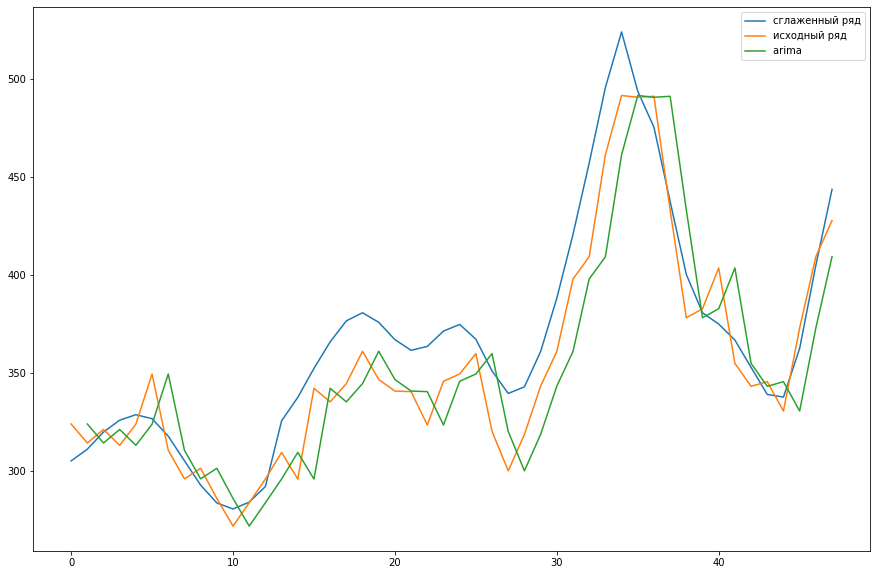

In [81]:


fig = plt.figure(figsize = [15,10])

plt.plot(new_data)
plt.plot(data['y'])
plt.plot(arima_pred)
plt.legend(['сглаженный ряд', 'исходный ряд', 'arima '])

plt.savefig("result.png")